In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 4_1


In [2]:
df = pd.read_csv('res/brain.tsv', sep = '\t')
df.info(), df.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Gender       40 non-null object
FSIQ         40 non-null int64
VIQ          40 non-null int64
PIQ          40 non-null int64
Weight       40 non-null object
Height       40 non-null object
MRI_Count    40 non-null int64
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


(None,
 Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object'))

- интеллектуальные коэффициенты (FSIQ),
- словесные интеллектуальные коэффициенты (VIQ) 
- интеллектуальные коэффициенты производительности (PIQ), 
- рост (Weight)
- вес (Height)
- размер мозга людей (MRI_Count)


In [3]:
keys = ['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count']
for k in keys:
    df[k] = pd.to_numeric(df[k], errors="coerce", downcast='float')



df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 7 columns):
Gender       38 non-null object
FSIQ         38 non-null float32
VIQ          38 non-null float32
PIQ          38 non-null float32
Weight       38 non-null float32
Height       38 non-null float32
MRI_Count    38 non-null float32
dtypes: float32(6), object(1)
memory usage: 1.5+ KB


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


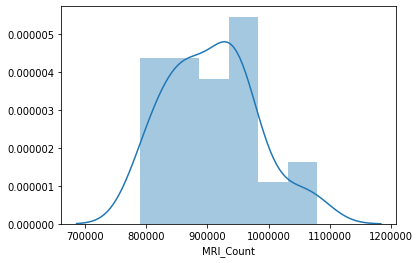

In [4]:
sns.distplot(df.MRI_Count)

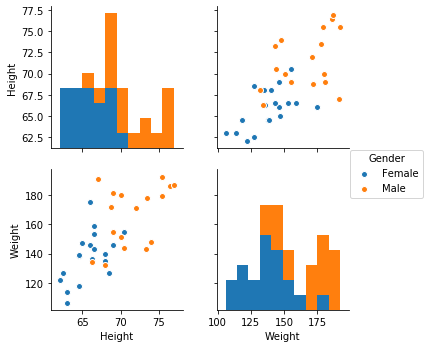

In [16]:
sns.pairplot(df[['Height', 'Weight', 'Gender']], hue= 'Gender')

## MALE & FEMALE

In [17]:
corr = df[['MRI_Count', 'FSIQ']].corr()
r= corr.MRI_Count['FSIQ']
t = (r * np.sqrt(len(df) - 3)) / (np.sqrt(1 - r**2))
t

2.0943358027912313

при alpha = 0,05 и f = 36 степеней свободы t_критич = 2,028
т. к. t > t_критич => нулевая гипотеза на уровне значимости α принимается

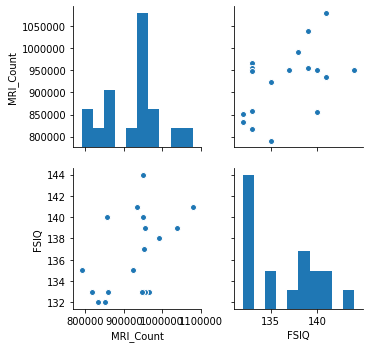

In [24]:
sns.pairplot(df[(df.FSIQ > 130)][['MRI_Count', 'FSIQ']])

## MALE

In [18]:
corr = df[(df.Gender == 'Male')][['MRI_Count', 'FSIQ']].corr()
r= corr.MRI_Count['FSIQ']
t = (r * np.sqrt(len(df) - 3)) / (np.sqrt(1 - r**2))
t

2.8288859552802834

при alpha = 0,05 и f = 36 степеней свободы t_критич = 2,028
т. к. t > t_критич => нулевая гипотеза на уровне значимости α принимается

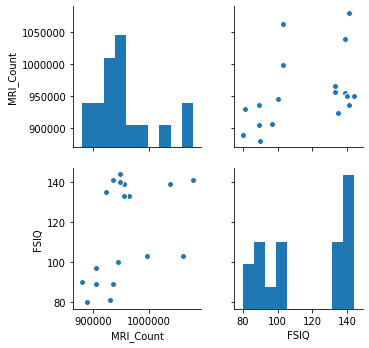

In [26]:
sns.pairplot(df[(df.Gender == 'Male')][['MRI_Count', 'FSIQ']])

## FEMALE

In [27]:
corr = df[(df.Gender == 'Female')][['MRI_Count', 'FSIQ']].corr()
r= corr.MRI_Count['FSIQ']
t = (r * np.sqrt(len(df) - 3)) / (np.sqrt(1 - r**2))
t

2.037969363454936

при alpha = 0,05 и f = 36 степеней свободы t_критич = 2,028
т. к. t > t_критич => нулевая гипотеза на уровне значимости α принимается

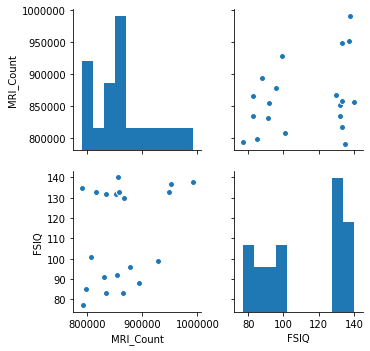

In [28]:
sns.pairplot(df[(df.Gender == 'Female')][['MRI_Count', 'FSIQ']])

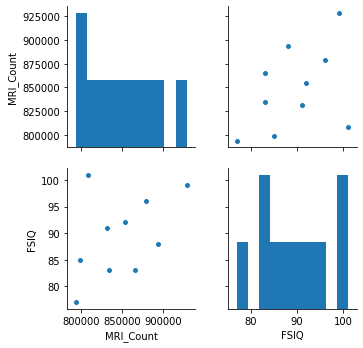

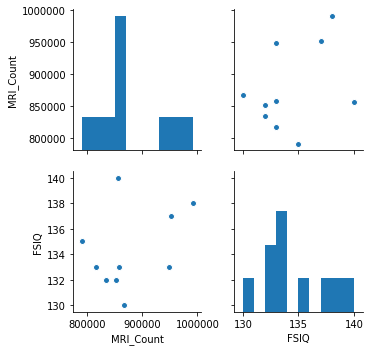

In [38]:
sns.pairplot(df[(df.Gender == 'Female') & (df.FSIQ < 110)][['MRI_Count', 'FSIQ']])
sns.pairplot(df[(df.Gender == 'Female') & (df.FSIQ > 120)][['MRI_Count', 'FSIQ']])

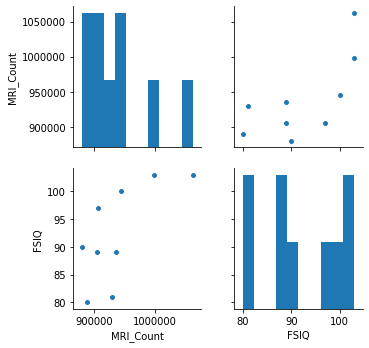

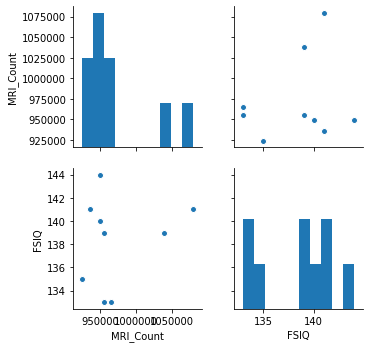

In [39]:
sns.pairplot(df[(df.Gender == 'Male') & (df.FSIQ < 110)][['MRI_Count', 'FSIQ']])
sns.pairplot(df[(df.Gender == 'Male') & (df.FSIQ > 120)][['MRI_Count', 'FSIQ']])

ВЫВОД:

Можно утверждать, что есть связь между размером мозга и уровнем интелекта у мужчин и женщин вместе и по раздельности. Но нельзя не исключать тот факт что существует явный разрыв между значениями уровня интелекта между 110 и 130. 

## 4_2

In [42]:
import requests
import scipy

r = requests.get('http://www.statsci.org/data/oz/carprefs.txt').text
data = [x.split('\t') for x in r.split('\n')]

df = pd.DataFrame.from_records(data[1:], columns=data[0]).dropna()
for key in df.keys():
    df[key] = df[key].astype(int)

In [43]:
feature = ['LicYr', 'LicMth', 'ActCar', 'Kids5', 'Kids6',
       'PreferCar', 'Car15K', 'Reason', 'Cost', 'Reliable', 'Perform', 'Fuel',
       'Safety', 'AC/PS', 'Park', 'Room', 'Doors', 'Prestige', 'Colour']


for f in feature:
    ct = pd.crosstab(df.Sex, df[f])
    chi, p_value, dof, d, = scipy.stats.chi2_contingency(ct)
    if p_value < 0.05:
        print('Feature {0}'.format(f))


Feature PreferCar
Feature Car15K
Feature Reason
Feature Cost
Feature Reliable
Feature Perform
Feature Fuel
Feature Safety
Feature AC/PS
Feature Park


Вывод:

Среди 22 признаков различия в выборе автомобиля у мужчин и женщин сущетсвуют только по этим признакам